## About the Problem

The customer bying pattern and their charecteristics of visiting the e-commerce portal was captured in the dataset. This dataset can be used for churn analytics. Here in this work, the objective is to segment the customers based on the provided charecteristics. 

### ATTRIBUTES:
1. 'Customer ID'
2. 'STD_Sales', 
3. 'Hist_Visits', 
4. 'W1_Min_Sale', 
5. 'W1_STD_Sales',
6. 'W1_Visits', 
7. 'W2_Min_Sale', 
8. 'W2_STD_Sales', 
9. 'W2_Visits', 
10. 'W3_Sale',
11. 'W3_Max_Sale', 
12. 'W3_Min_Sale', 
13. 'W3_STD_Sales', 
14. 'W3_Visits', 
15. 'W4_Sale',
16. 'W4_Min_Sale', 
17. 'W4_STD_Sales', 
18. 'W4_Visits', 
19. 'W5_STD_Sales', 
20. 'W5_Visits',
21. 'week_1', 
22. 'week_2', 
23. 'week_3', 
24. 'week_4', 
25. 'APV', 
26. 'Days_since_last_visit',
27. 'Customer_Value', 
28. 'Visitors_Type'
29. 'Total_Sale'

In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram,cophenet
from yellowbrick.cluster import SilhouetteVisualizer

In [91]:
df = pd.read_csv('data_set.csv')

In [92]:
df.head()

CUSTOMER_ID  Total_Sale  STD_Sales  Hist_Visits  W1_Min_Sale  W1_STD_Sales  \
0   1123606416    6.174536   2.286530     1.945910     4.241039      0.000000   
1   1174135872    7.351749   4.087801     2.564949     4.461300      4.119498   
2   1108114998    6.307807   2.286530     1.945910     4.461300      0.000000   
3   1123606602    7.450986   3.234717     3.295837     3.958143      3.559136   
4   1123606376    6.901697   2.791937     1.791759     5.330010      0.000000   

   W1_Visits  W2_Min_Sale  W2_STD_Sales  W2_Visits  ...  W5_STD_Sales  \
0          1     4.461300      0.000000          1  ...      0.000000   
1          2     4.794467      3.422721          3  ...      0.000000   
2          2     0.000000      0.000000          0  ...      0.000000   
3          6     3.958143      3.176757          5  ...      3.283914   
4          1     5.330010      0.000000          1  ...      0.000000   

   W5_Visits  week_1  week_2  week_3  week_4       APV  Days_since_last_visit  \
0          1       1       1       1       1  4.393131               1.098612   
1          1       1       1       1       1  4.873873               1.609438   
2          1       1       0       1       1  4.525116               1.098612   
3          4       1       1       1       1  4.207307               0.000000   
4          1       1       1       1       1  5.296275               1.609438   

   Customer_Value     Visitors_Type  
0         Regular  Regular_Visitors  
1         Regular  Regular_Visitors  
2         Regular  Regular_Visitors  
3         Regular  Frequent_Visitor  
4         Regular  Regular_Visitors  

[5 rows x 29 columns]

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10007 entries, 0 to 10006
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CUSTOMER_ID            10007 non-null  int64  
 1   Total_Sale             10007 non-null  float64
 2   STD_Sales              10007 non-null  float64
 3   Hist_Visits            10007 non-null  float64
 4   W1_Min_Sale            10007 non-null  float64
 5   W1_STD_Sales           10007 non-null  float64
 6   W1_Visits              10007 non-null  int64  
 7   W2_Min_Sale            10007 non-null  float64
 8   W2_STD_Sales           10007 non-null  float64
 9   W2_Visits              10007 non-null  int64  
 10  W3_Sale                10007 non-null  float64
 11  W3_Max_Sale            10007 non-null  float64
 12  W3_Min_Sale            10007 non-null  float64
 13  W3_STD_Sales           10007 non-null  float64
 14  W3_Visits              10007 non-null  int64  
 15  W4

In [94]:
print('Rows:',df.shape[0])
print('Columns:',df.shape[1])

Rows: 10007
Columns: 29


In [95]:
catcols = ['Customer_Value','week_2','week_1','CUSTOMER_ID','W1_Visits','W5_Visits','Visitors_Type','W3_Visits','W4_Visits'
          ,'W2_Visits','week_4','week_3']

In [96]:
numcols = list(set(df.columns)-set(catcols))

In [97]:
numcols

['APV',
 'W3_Max_Sale',
 'W4_Min_Sale',
 'Total_Sale',
 'Days_since_last_visit',
 'W3_Min_Sale',
 'STD_Sales',
 'Hist_Visits',
 'W2_STD_Sales',
 'W1_STD_Sales',
 'W4_Sale',
 'W5_STD_Sales',
 'W2_Min_Sale',
 'W3_Sale',
 'W1_Min_Sale',
 'W3_STD_Sales',
 'W4_STD_Sales']

In [98]:
df.loc[:,numcols].describe().T

count      mean       std       min       25%  \
APV                    10007.0  4.752613  0.544509  0.000000  4.357222   
W3_Max_Sale            10007.0  3.198329  2.356440  0.000000  0.000000   
W4_Min_Sale            10007.0  2.870197  2.280490  0.000000  0.000000   
Total_Sale             10007.0  6.238656  0.944606  0.000000  5.552184   
Days_since_last_visit  10007.0  1.726952  1.095446  0.000000  0.693147   
W3_Min_Sale            10007.0  3.039286  2.240247  0.000000  0.000000   
STD_Sales              10007.0  2.625358  1.811266  0.000000  0.000000   
Hist_Visits            10007.0  1.742498  0.608359  0.693147  1.386294   
W2_STD_Sales           10007.0  0.667449  1.467786  0.000000  0.000000   
W1_STD_Sales           10007.0  0.634109  1.436332  0.000000  0.000000   
W4_Sale                10007.0  3.224320  2.571686  0.000000  0.000000   
W5_STD_Sales           10007.0  0.572955  1.379209  0.000000  0.000000   
W2_Min_Sale            10007.0  2.832834  2.301659  0.000000  0.000000   
W3_Sale                10007.0  3.448120  2.556949  0.000000  0.000000   
W1_Min_Sale            10007.0  2.752946  2.321018  0.000000  0.000000   
W3_STD_Sales           10007.0  0.824347  1.605491  0.000000  0.000000   
W4_STD_Sales           10007.0  0.697303  1.480040  0.000000  0.000000   

                            50%       75%       max  
APV                    4.641695  5.148657  8.234140  
W3_Max_Sale            4.461300  5.148657  8.234140  
W4_Min_Sale            3.958143  4.461300  7.851272  
Total_Sale             6.307807  6.952078  9.332576  
Days_since_last_visit  1.791759  2.639057  3.496508  
W3_Min_Sale            3.958143  4.461300  8.234140  
STD_Sales              3.176757  3.974285  6.743348  
Hist_Visits            1.791759  2.197225  3.496508  
W2_STD_Sales           0.000000  0.000000  6.669331  
W1_STD_Sales           0.000000  0.000000  7.071294  
W4_Sale                4.461300  5.330010  8.100647  
W5_STD_Sales           0.000000  0.000000  6.820336  
W2_Min_Sale            3.958143  4.461300  7.851272  
W3_Sale                4.461300  5.552184  8.234140  
W1_Min_Sale            3.958143  4.461300  8.234140  
W3_STD_Sales           0.000000  0.000000  6.743348  
W4_STD_Sales           0.000000  0.000000  6.407348

In [99]:
#Ans-1c)
for i in catcols:
    print(df[i].value_counts(normalize=True)*100)

Regular       99.910063
Low_Value      0.069951
High_Value     0.019986
Name: Customer_Value, dtype: float64
1    61.217148
0    38.782852
Name: week_2, dtype: float64
1    59.4284
0    40.5716
Name: week_1, dtype: float64
1153466368    0.009993
1053088534    0.009993
1108556554    0.009993
138835074     0.009993
1086704396    0.009993
                ...   
1119376800    0.009993
1048100294    0.009993
1098991010    0.009993
72517732      0.009993
1119096830    0.009993
Name: CUSTOMER_ID, Length: 10007, dtype: float64
0    40.571600
1    32.537224
2    15.788948
3     6.415509
4     2.848006
5     1.279105
6     0.469671
7     0.089937
Name: W1_Visits, dtype: float64
1    74.258019
2    18.786849
3     4.956530
4     1.548916
5     0.449685
Name: W5_Visits, dtype: float64
Regular_Visitors    88.368142
Rare_Visitor         9.913061
Frequent_Visitor     1.718797
Name: Visitors_Type, dtype: float64
0    34.166084
1    32.137504
2    18.626961
3     8.623963
4     3.867293
5     1.608874


In [100]:
df.cov()

CUSTOMER_ID    Total_Sale     STD_Sales   Hist_Visits  \
CUSTOMER_ID            1.426536e+17 -1.619576e+07 -1.730730e+07 -5.820679e+06   
Total_Sale            -1.619576e+07  8.922811e-01  9.830318e-01  4.638865e-01   
STD_Sales             -1.730730e+07  9.830318e-01  3.280685e+00  5.354862e-01   
Hist_Visits           -5.820679e+06  4.638865e-01  5.354862e-01  3.701011e-01   
W1_Min_Sale           -3.716527e+07  1.255068e+00  1.305932e+00  8.049969e-01   
W1_STD_Sales          -1.454389e+07  5.515713e-01  7.999979e-01  4.199024e-01   
W1_Visits             -1.543633e+07  6.499944e-01  6.402038e-01  5.381796e-01   
W2_Min_Sale           -3.697904e+07  1.252052e+00  1.351633e+00  8.209574e-01   
W2_STD_Sales          -3.556215e+06  5.714608e-01  8.521046e-01  4.366716e-01   
W2_Visits             -1.007600e+07  6.679484e-01  6.566762e-01  5.592045e-01   
W3_Sale               -2.406628e+07  1.603297e+00  1.795650e+00  1.103933e+00   
W3_Max_Sale           -2.263148e+07  1.412441e+00  1.644978e+00  9.366945e-01   
W3_Min_Sale           -2.092190e+07  1.273383e+00  1.423268e+00  8.322396e-01   
W3_STD_Sales          -5.482938e+06  6.813858e-01  1.056984e+00  5.123497e-01   
W3_Visits             -6.971489e+06  7.558335e-01  7.641406e-01  6.265026e-01   
W4_Sale               -3.592092e+06  1.555646e+00  1.786867e+00  1.105862e+00   
W4_Min_Sale           -4.070983e+06  1.275127e+00  1.475522e+00  8.665025e-01   
W4_STD_Sales           4.255393e+05  5.714961e-01  8.592220e-01  4.411869e-01   
W4_Visits              2.218989e+06  6.824721e-01  7.010747e-01  5.816208e-01   
W5_STD_Sales          -6.912283e+05  4.140685e-01  7.380677e-01  3.110415e-01   
W5_Visits              1.102278e+06  2.428359e-01  2.679342e-01  2.202004e-01   
week_1                -7.262147e+06  2.494572e-01  2.727921e-01  1.827931e-01   
week_2                -7.084525e+06  2.482754e-01  2.788078e-01  1.853274e-01   
week_3                -3.801615e+06  2.518265e-01  2.924953e-01  1.885550e-01   
week_4                -2.901973e+05  2.539751e-01  3.052085e-01  1.950364e-01   
APV                   -8.145887e+06  2.951288e-01  2.689557e-01 -4.750438e-03   
Days_since_last_visit  2.210830e+07 -6.371547e-01 -7.410123e-01 -4.762125e-01   

                        W1_Min_Sale  W1_STD_Sales     W1_Visits   W2_Min_Sale  \
CUSTOMER_ID           -3.716527e+07 -1.454389e+07 -1.543633e+07 -3.697904e+07   
Total_Sale             1.255068e+00  5.515713e-01  6.499944e-01  1.252052e+00   
STD_Sales              1.305932e+00  7.999979e-01  6.402038e-01  1.351633e+00   
Hist_Visits            8.049969e-01  4.199024e-01  5.381796e-01  8.209574e-01   
W1_Min_Sale            5.387122e+00  1.020722e+00  1.850435e+00  1.736314e+00   
W1_STD_Sales           1.020722e+00  2.063051e+00  1.112018e+00  7.388451e-01   
W1_Visits              1.850435e+00  1.112018e+00  1.429028e+00  9.224130e-01   
W2_Min_Sale            1.736314e+00  7.388451e-01  9.224130e-01  5.297633e+00   
W2_STD_Sales           6.972967e-01  6.776011e-01  6.316715e-01  1.026544e+00   
W2_Visits              9.203258e-01  6.486765e-01  8.380279e-01  1.839102e+00   
W3_Sale                2.359262e+00  1.039105e+00  1.301958e+00  2.218327e+00   
W3_Max_Sale            2.087494e+00  8.611325e-01  1.061605e+00  1.941721e+00   
W3_Min_Sale            1.917551e+00  7.024096e-01  9.083893e-01  1.782514e+00   
W3_STD_Sales           8.795581e-01  7.484523e-01  7.292968e-01  8.324729e-01   
W3_Visits              1.065297e+00  6.856966e-01  8.811713e-01  1.040113e+00   
W4_Sale                1.917590e+00  1.019626e+00  1.211025e+00  2.164420e+00   
W4_Min_Sale            1.596359e+00  7.464285e-01  8.828662e-01  1.829343e+00   
W4_STD_Sales           6.317696e-01  5.867315e-01  5.797318e-01  6.671358e-01   
W4_Visits              8.054305e-01  5.902537e-01  7.628263e-01  8.764979e-01   
W5_STD_Sales           3.397673e-01  4.046814e-01  4.016515e-01  3.674338e-01   
W5_Visits              2.157690e-01  2.452129e-01  3.0

In [101]:
df.corr()

CUSTOMER_ID  Total_Sale  STD_Sales  Hist_Visits  \
CUSTOMER_ID               1.000000   -0.045395  -0.025299    -0.025332   
Total_Sale               -0.045395    1.000000   0.574559     0.807236   
STD_Sales                -0.025299    0.574559   1.000000     0.485966   
Hist_Visits              -0.025332    0.807236   0.485966     1.000000   
W1_Min_Sale              -0.042395    0.572451   0.310642     0.570106   
W1_STD_Sales             -0.026809    0.406533   0.307505     0.480544   
W1_Visits                -0.034189    0.575623   0.295676     0.740025   
W2_Min_Sale              -0.042538    0.575878   0.324217     0.586299   
W2_STD_Sales             -0.006415    0.412167   0.320515     0.489026   
W2_Visits                -0.022018    0.583619   0.299231     0.758661   
W3_Sale                  -0.024920    0.663806   0.387719     0.709676   
W3_Max_Sale              -0.025428    0.634546   0.385409     0.653403   
W3_Min_Sale              -0.024727    0.601745   0.350759     0.610650   
W3_STD_Sales             -0.009042    0.449298   0.363478     0.524564   
W3_Visits                -0.014239    0.617274   0.325457     0.794448   
W4_Sale                  -0.003698    0.640386   0.383612     0.706843   
W4_Min_Sale              -0.004726    0.591935   0.357219     0.624570   
W4_STD_Sales              0.000761    0.408779   0.320516     0.489992   
W4_Visits                 0.004718    0.580170   0.310816     0.767717   
W5_STD_Sales             -0.001327    0.317827   0.295450     0.370705   
W5_Visits                 0.004239    0.373395   0.214859     0.525732   
week_1                   -0.039156    0.537793   0.306704     0.611885   
week_2                   -0.038494    0.539392   0.315896     0.625175   
week_3                   -0.021222    0.562091   0.340481     0.653482   
week_4                   -0.001585    0.554690   0.347636     0.661402   
APV                      -0.039609    0.573794   0.272705    -0.014341   
Days_since_last_visit     0.053435   -0.615748  -0.373467    -0.714578   

                       W1_Min_Sale  W1_STD_Sales  W1_Visits  W2_Min_Sale  \
CUSTOMER_ID              -0.042395     -0.026809  -0.034189    -0.042538   
Total_Sale                0.572451      0.406533   0.575623     0.575878   
STD_Sales                 0.310642      0.307505   0.295676     0.324217   
Hist_Visits               0.570106      0.480544   0.740025     0.586299   
W1_Min_Sale               1.000000      0.306178   0.666922     0.325019   
W1_STD_Sales              0.306178      1.000000   0.647644     0.223490   
W1_Visits                 0.666922      0.647644   1.000000     0.335246   
W2_Min_Sale               0.325019      0.223490   0.335246     1.000000   
W2_STD_Sales              0.204681      0.321408   0.360005     0.303860   
W2_Visits                 0.327266      0.372744   0.578596     0.659481   
W3_Sale                   0.397535      0.282932   0.425946     0.376932   
W3_Max_Sale               0.381672      0.254424   0.376865     0.358005   
W3_Min_Sale               0.368784      0.218293   0.339200     0.345697   
W3_STD_Sales              0.236036      0.324565   0.379993     0.225279   
W3_Visits                 0.354075      0.368281   0.568647     0.348612   
W4_Sale                   0.321262      0.276037   0.393926     0.365664   
W4_Min_Sale               0.301595      0.227879   0.323852     0.348519   
W4_STD_Sales              0.183911      0.276001   0.327667     0.195839   
W4_Visits                 0.278658      0.329993   0.512421     0.305796   
W5_STD_Sales              0.106139      0.204281   0.243612     0.115747   
W5_Visits                 0.135026      0.247968   0.367851     0.148975   
week_1                    0.980065      0.364792   0.722992     0.321200   
week_2                    0.321673      0.242666   0.368429     0.979682   
week_3                    0.363675      0.233355   0.371074     0.338480   
week_4                    0.291868      0.236211  

In [102]:
sns.pairplot(df)


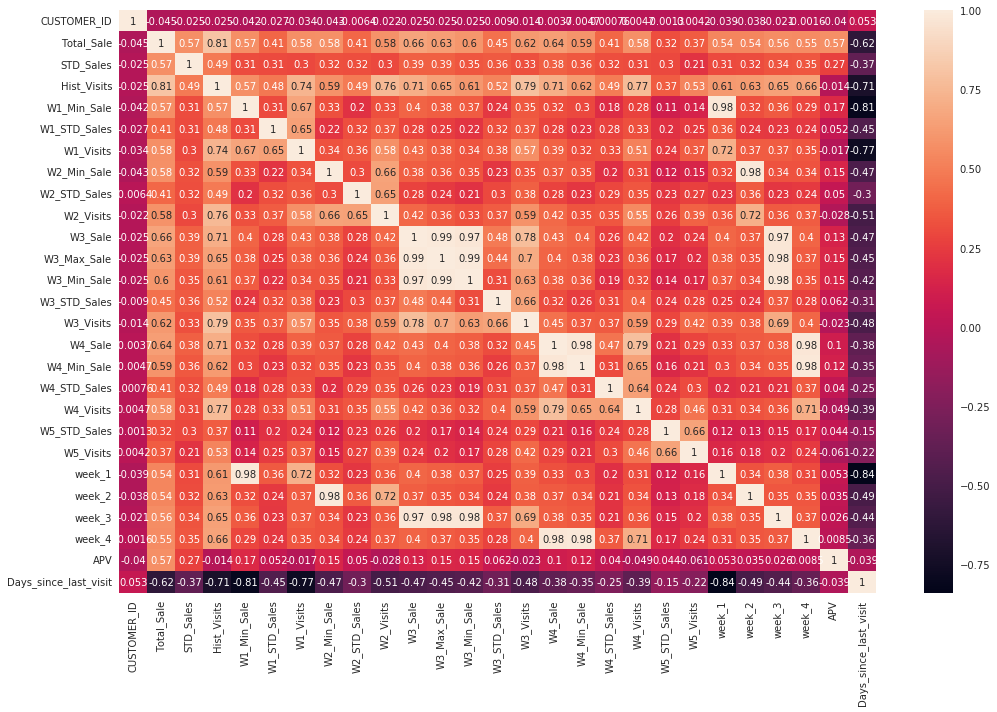

In [103]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()
plt.show()

### Data Preparation

In [104]:
df.isnull().sum()

CUSTOMER_ID              0
Total_Sale               0
STD_Sales                0
Hist_Visits              0
W1_Min_Sale              0
W1_STD_Sales             0
W1_Visits                0
W2_Min_Sale              0
W2_STD_Sales             0
W2_Visits                0
W3_Sale                  0
W3_Max_Sale              0
W3_Min_Sale              0
W3_STD_Sales             0
W3_Visits                0
W4_Sale                  0
W4_Min_Sale              0
W4_STD_Sales             0
W4_Visits                0
W5_STD_Sales             0
W5_Visits                0
week_1                   0
week_2                   0
week_3                   0
week_4                   0
APV                      0
Days_since_last_visit    0
Customer_Value           0
Visitors_Type            0
dtype: int64

In [105]:
df.drop('CUSTOMER_ID',axis=1,inplace=True)

In [106]:
df.std()

Total_Sale               0.944606
STD_Sales                1.811266
Hist_Visits              0.608359
W1_Min_Sale              2.321018
W1_STD_Sales             1.436332
W1_Visits                1.195420
W2_Min_Sale              2.301659
W2_STD_Sales             1.467786
W2_Visits                1.211610
W3_Sale                  2.556949
W3_Max_Sale              2.356440
W3_Min_Sale              2.240247
W3_STD_Sales             1.605491
W3_Visits                1.296276
W4_Sale                  2.571686
W4_Min_Sale              2.280490
W4_STD_Sales             1.480040
W4_Visits                1.245313
W5_STD_Sales             1.379209
W5_Visits                0.688483
week_1                   0.491055
week_2                   0.487279
week_3                   0.474290
week_4                   0.484719
APV                      0.544509
Days_since_last_visit    1.095446
dtype: float64

In [107]:
sc = StandardScaler()

In [108]:
le = LabelEncoder()

<IPython.core.display.Javascript object>

In [109]:
c1 =['Customer_Value', 'Visitors_Type']

In [110]:
df.loc[:,c1] = le.fit_transform(c1)

In [111]:
df1 = pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [112]:
df1

Total_Sale  STD_Sales  Hist_Visits  W1_Min_Sale  W1_STD_Sales  \
0       -0.067884  -0.187077     0.334378     0.641170     -0.441500   
1        1.178426   0.807455     1.351984     0.736073      2.426710   
2        0.073210  -0.187077     0.334378     0.736073     -0.441500   
3        1.283488   0.336444     2.553452     0.519280      2.036557   
4        0.701958   0.091973     0.080978     1.110372     -0.441500   
...           ...        ...          ...          ...           ...   
10002   -3.537777  -1.449533    -1.724973    -1.186154     -0.441500   
10003   -3.537777  -1.449533    -1.724973    -1.186154     -0.441500   
10004   -2.833570  -1.449533    -1.058450    -1.186154     -0.441500   
10005   -6.604834  -1.449533    -1.724973    -1.186154     -0.441500   
10006   -2.833570  -1.449533    -1.724973    -1.186154     -0.441500   

       W1_Visits  W2_Min_Sale  W2_STD_Sales  W2_Visits   W3_Sale  ...  \
0      -0.038455     0.707554     -0.454755  -0.074810  0.665098  ...   
1       0.798113     0.852312      1.877256   1.575968  1.037408  ...   
2       0.798113    -1.230841     -0.454755  -0.900200  0.396265  ...   
3       4.144385     0.488937      1.709672   3.226747  1.052137  ...   
4      -0.038455     1.085000     -0.454755  -0.074810  0.736027  ...   
...          ...          ...           ...        ...       ...  ...   
10002  -0.875023    -1.230841     -0.454755  -0.900200 -1.348596  ...   
10003  -0.875023    -1.230841     -0.454755  -0.900200 -1.348596  ...   
10004  -0.875023    -1.230841     -0.454755  -0.900200 -0.215542  ...   
10005  -0.875023    -1.230841     -0.454755  -0.900200 -1.348596  ...   
10006  -0.875023    -1.230841     -0.454755  -0.900200 -1.348596  ...   

       W5_STD_Sales  W5_Visits    week_1    week_2    week_3    week_4  \
0         -0.415443  -0.510501  0.826255  0.795945  0.720398  0.778296   
1         -0.415443  -0.510501  0.826255  0.795945  0.720398  0.778296   
2         -0.415443  -0.510501  0.826255 -1.256367  0.720398  0.778296   
3          1.965688   3.847121  0.826255  0.795945  0.720398  0.778296   
4         -0.415443  -0.510501  0.826255  0.795945  0.720398  0.778296   
...             ...        ...       ...       ...       ...       ...   
10002     -0.415443  -0.510501 -1.210280 -1.256367 -1.388121 -1.284858   
10003     -0.415443  -0.510501 -1.210280 -1.256367 -1.388121 -1.284858   
10004     -0.415443  -0.510501 -1.210280 -1.256367  0.720398 -1.284858   
10005     -0.415443  -0.510501 -1.210280 -1.256367 -1.388121 -1.284858   
10006     -0.415443  -0.510501 -1.210280 -1.256367 -1.388121 -1.284858   

            APV  Days_since_last_visit  Customer_Value  Visitors_Type  
0     -0.660227              -0.573621             0.0            0.0  
1      0.222708              -0.107281             0.0            0.0  
2     -0.417822              -0.573621             0.0            0.0  
3     -1.001514              -1.576562             0.0            0.0  
4      0.998495              -0.107281             0.0            0.0  
...         ...                    ...             ...            ...  
10002 -3.408005               1.497495             0.0            0.0  
10003 -3.408005               1.528445             0.0            0.0  
10004 -3.408005               1.202830             0.0            0.0  
10005 -8.728690               1.615455             0.0            0.0  
10006 -2.186356               1.615455             0.0            0.0  

[10007 rows x 28 columns]

In [113]:
df1.std()

Total_Sale               1.00005
STD_Sales                1.00005
Hist_Visits              1.00005
W1_Min_Sale              1.00005
W1_STD_Sales             1.00005
W1_Visits                1.00005
W2_Min_Sale              1.00005
W2_STD_Sales             1.00005
W2_Visits                1.00005
W3_Sale                  1.00005
W3_Max_Sale              1.00005
W3_Min_Sale              1.00005
W3_STD_Sales             1.00005
W3_Visits                1.00005
W4_Sale                  1.00005
W4_Min_Sale              1.00005
W4_STD_Sales             1.00005
W4_Visits                1.00005
W5_STD_Sales             1.00005
W5_Visits                1.00005
week_1                   1.00005
week_2                   1.00005
week_3                   1.00005
week_4                   1.00005
APV                      1.00005
Days_since_last_visit    1.00005
Customer_Value           0.00000
Visitors_Type            0.00000
dtype: float64

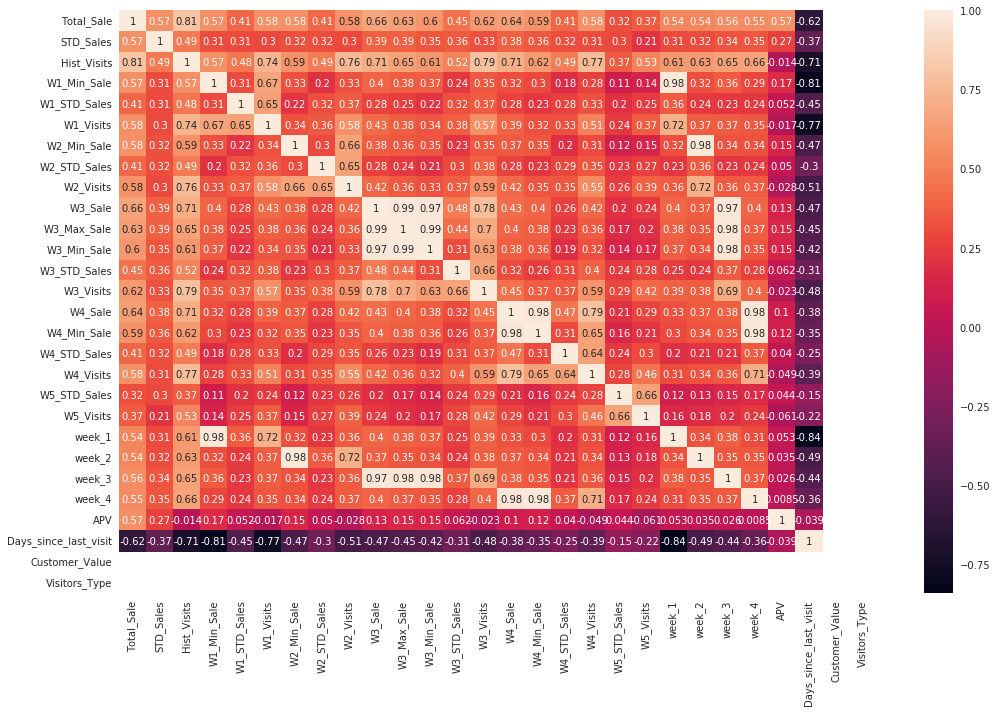

In [114]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)
plt.tight_layout()
plt.show()

In [115]:
df1.cov()

Total_Sale  STD_Sales  Hist_Visits  W1_Min_Sale  \
Total_Sale               1.000100   0.574616     0.807317     0.572508   
STD_Sales                0.574616   1.000100     0.486014     0.310673   
Hist_Visits              0.807317   0.486014     1.000100     0.570163   
W1_Min_Sale              0.572508   0.310673     0.570163     1.000100   
W1_STD_Sales             0.406574   0.307535     0.480592     0.306209   
W1_Visits                0.575681   0.295705     0.740099     0.666989   
W2_Min_Sale              0.575936   0.324249     0.586358     0.325052   
W2_STD_Sales             0.412208   0.320547     0.489075     0.204701   
W2_Visits                0.583677   0.299261     0.758737     0.327298   
W3_Sale                  0.663872   0.387758     0.709747     0.397575   
W3_Max_Sale              0.634610   0.385447     0.653469     0.381710   
W3_Min_Sale              0.601805   0.350794     0.610711     0.368821   
W3_STD_Sales             0.449343   0.363514     0.524616     0.236060   
W3_Visits                0.617336   0.325490     0.794527     0.354110   
W4_Sale                  0.640450   0.383650     0.706913     0.321294   
W4_Min_Sale              0.591994   0.357255     0.624633     0.301625   
W4_STD_Sales             0.408820   0.320548     0.490041     0.183929   
W4_Visits                0.580228   0.310847     0.767794     0.278686   
W5_STD_Sales             0.317859   0.295479     0.370742     0.106149   
W5_Visits                0.373432   0.214880     0.525785     0.135039   
week_1                   0.537847   0.306735     0.611946     0.980163   
week_2                   0.539446   0.315928     0.625237     0.321706   
week_3                   0.562147   0.340515     0.653547     0.363711   
week_4                   0.554745   0.347670     0.661468     0.291897   
APV                      0.573851   0.272732    -0.014342     0.167656   
Days_since_last_visit   -0.615810  -0.373504    -0.714649    -0.809124   
Customer_Value           0.000000   0.000000     0.000000     0.000000   
Visitors_Type            0.000000   0.000000     0.000000     0.000000   

                       W1_STD_Sales  W1_Visits  W2_Min_Sale  W2_STD_Sales  \
Total_Sale                 0.406574   0.575681     0.575936      0.412208   
STD_Sales                  0.307535   0.295705     0.324249      0.320547   
Hist_Visits                0.480592   0.740099     0.586358      0.489075   
W1_Min_Sale                0.306209   0.666989     0.325052      0.204701   
W1_STD_Sales               1.000100   0.647709     0.223512      0.321440   
W1_Visits                  0.647709   1.000100     0.335280      0.360041   
W2_Min_Sale                0.223512   0.335280     1.000100      0.303891   
W2_STD_Sales               0.321440   0.360041     0.303891      1.000100   
W2_Visits                  0.372781   0.578654     0.659547      0.648259   
W3_Sale                    0.282960   0.425989     0.376969      0.275445   
W3_Max_Sale                0.254450   0.376903     0.358041      0.242626   
W3_Min_Sale                0.218315   0.339234     0.345732      0.208102   
W3_STD_Sales               0.324597   0.380031     0.225302      0.301712   
W3_Visits                  0.368318   0.568704     0.348647      0.383527   
W4_Sale                    0.276065   0.393965     0.365701      0.280976   
W4_Min_Sale                0.227902   0.323884     0.348553      0.227888   
W4_STD_Sales               0.276029   0.327700     0.195859      0.293469   
W4_Visits                  0.330026   0.512472     0.305826      0.351854   
W5_STD_Sales               0.204302   0.243637     0.115758      0.230041   
W5_Visits                  0.247992   0.367888     0.148990      0.270043   
week_1                     0.364828   0.723065     0.321232      0.225237   
week_2                     0.242690   0.368466     0.979780      0.361996   
week_3                     0.233378   0.371111     0.338514      0.225574   
week_4                     0

In [116]:
pca = PCA(n_components=28)

In [117]:
m1 = pca.fit(df1)

In [118]:
m1.explained_variance_ratio_

array([4.34935866e-01, 9.59140916e-02, 8.52106113e-02, 7.01305888e-02,
       6.30651440e-02, 5.44691470e-02, 3.84553351e-02, 2.82012976e-02,
       2.71295035e-02, 2.59633867e-02, 2.54766150e-02, 1.37935191e-02,
       9.88089099e-03, 6.75622797e-03, 5.92050622e-03, 5.79046566e-03,
       4.82871609e-03, 1.96582938e-03, 6.81946208e-04, 4.85056824e-04,
       3.89332212e-04, 3.63707816e-04, 6.92921976e-05, 6.08501669e-05,
       4.56908609e-05, 1.63816126e-05, 3.01565897e-33, 3.01565897e-33])

In [119]:
np.cumsum(m1.explained_variance_ratio_)

array([0.43493587, 0.53084996, 0.61606057, 0.68619116, 0.7492563 ,
       0.80372545, 0.84218078, 0.87038208, 0.89751158, 0.92347497,
       0.94895159, 0.96274511, 0.972626  , 0.97938222, 0.98530273,
       0.9910932 , 0.99592191, 0.99788774, 0.99856969, 0.99905475,
       0.99944408, 0.99980779, 0.99987708, 0.99993793, 0.99998362,
       1.        , 1.        , 1.        ])

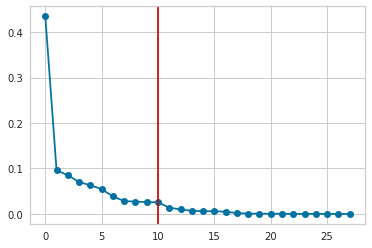

In [120]:
plt.plot(pca.explained_variance_ratio_,marker='o')
plt.axvline(x=10,color='r')
plt.show()

In [121]:
pca = PCA(n_components=10)

In [122]:
df2 = pd.DataFrame(pca.fit_transform(df1),columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10'])

In [123]:
df2

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0      1.348108 -0.896878 -0.009385 -1.425037  0.218108  1.387382  0.819467   
1      5.075227  0.553079  0.076499  0.711222  0.338707 -0.034289 -3.137415   
2      0.939245 -0.351275 -0.709452 -1.326693 -2.564487  0.627054 -0.183265   
3      7.549892  2.180024  1.281623  4.177946 -1.064014  1.287901  0.526003   
4      1.787982 -1.125931 -0.231333 -2.371314  0.631117 -0.253798  0.885755   
...         ...       ...       ...       ...       ...       ...       ...   
10002 -6.203142  0.695924  0.011195  1.749171 -0.792332  3.018928 -0.264639   
10003 -6.209889  0.696794  0.000399  1.752959 -0.788684  3.016851 -0.266699   
10004 -4.312009 -1.524849 -0.878900  2.024254 -0.861251  3.317606 -0.081095   
10005 -7.240698  1.179380 -0.005294  3.247801 -1.667038  7.834331  0.193041   
10006 -5.996536  0.588997 -0.035614  1.422833 -0.574400  1.903562 -0.379377   

           PCA8      PCA9     PCA10  
0     -0.035297 -0.182259 -0.110115  
1      0.448162  0.141211  0.457088  
2      1.044716  0.879637  0.190898  
3     -1.579292 -0.188572 -0.334827  
4     -0.009855  0.090358  0.009271  
...         ...       ...       ...  
10002 -0.216673 -0.141726 -0.038406  
10003 -0.217579 -0.141040 -0.038158  
10004 -0.189715  0.295904  0.191569  
10005 -0.602846 -0.491244 -0.112926  
10006 -0.132250 -0.058257 -0.020131  

[10007 rows x 10 columns]

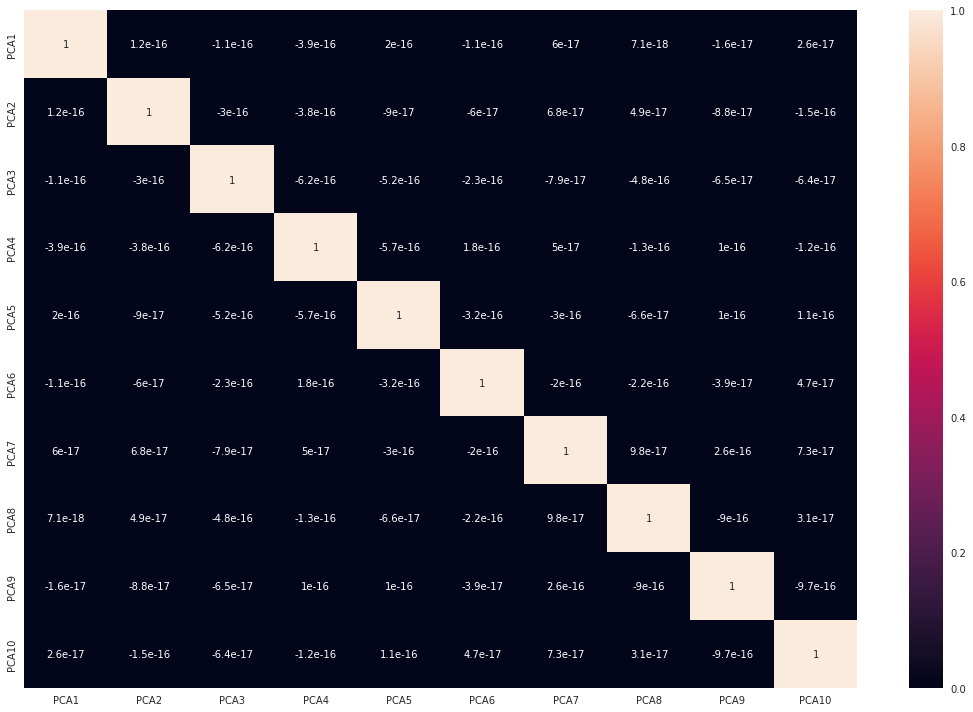

In [124]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(),annot=True)
plt.tight_layout()
plt.show()

In [ ]:
# There is no multicoliniearity present in the data.

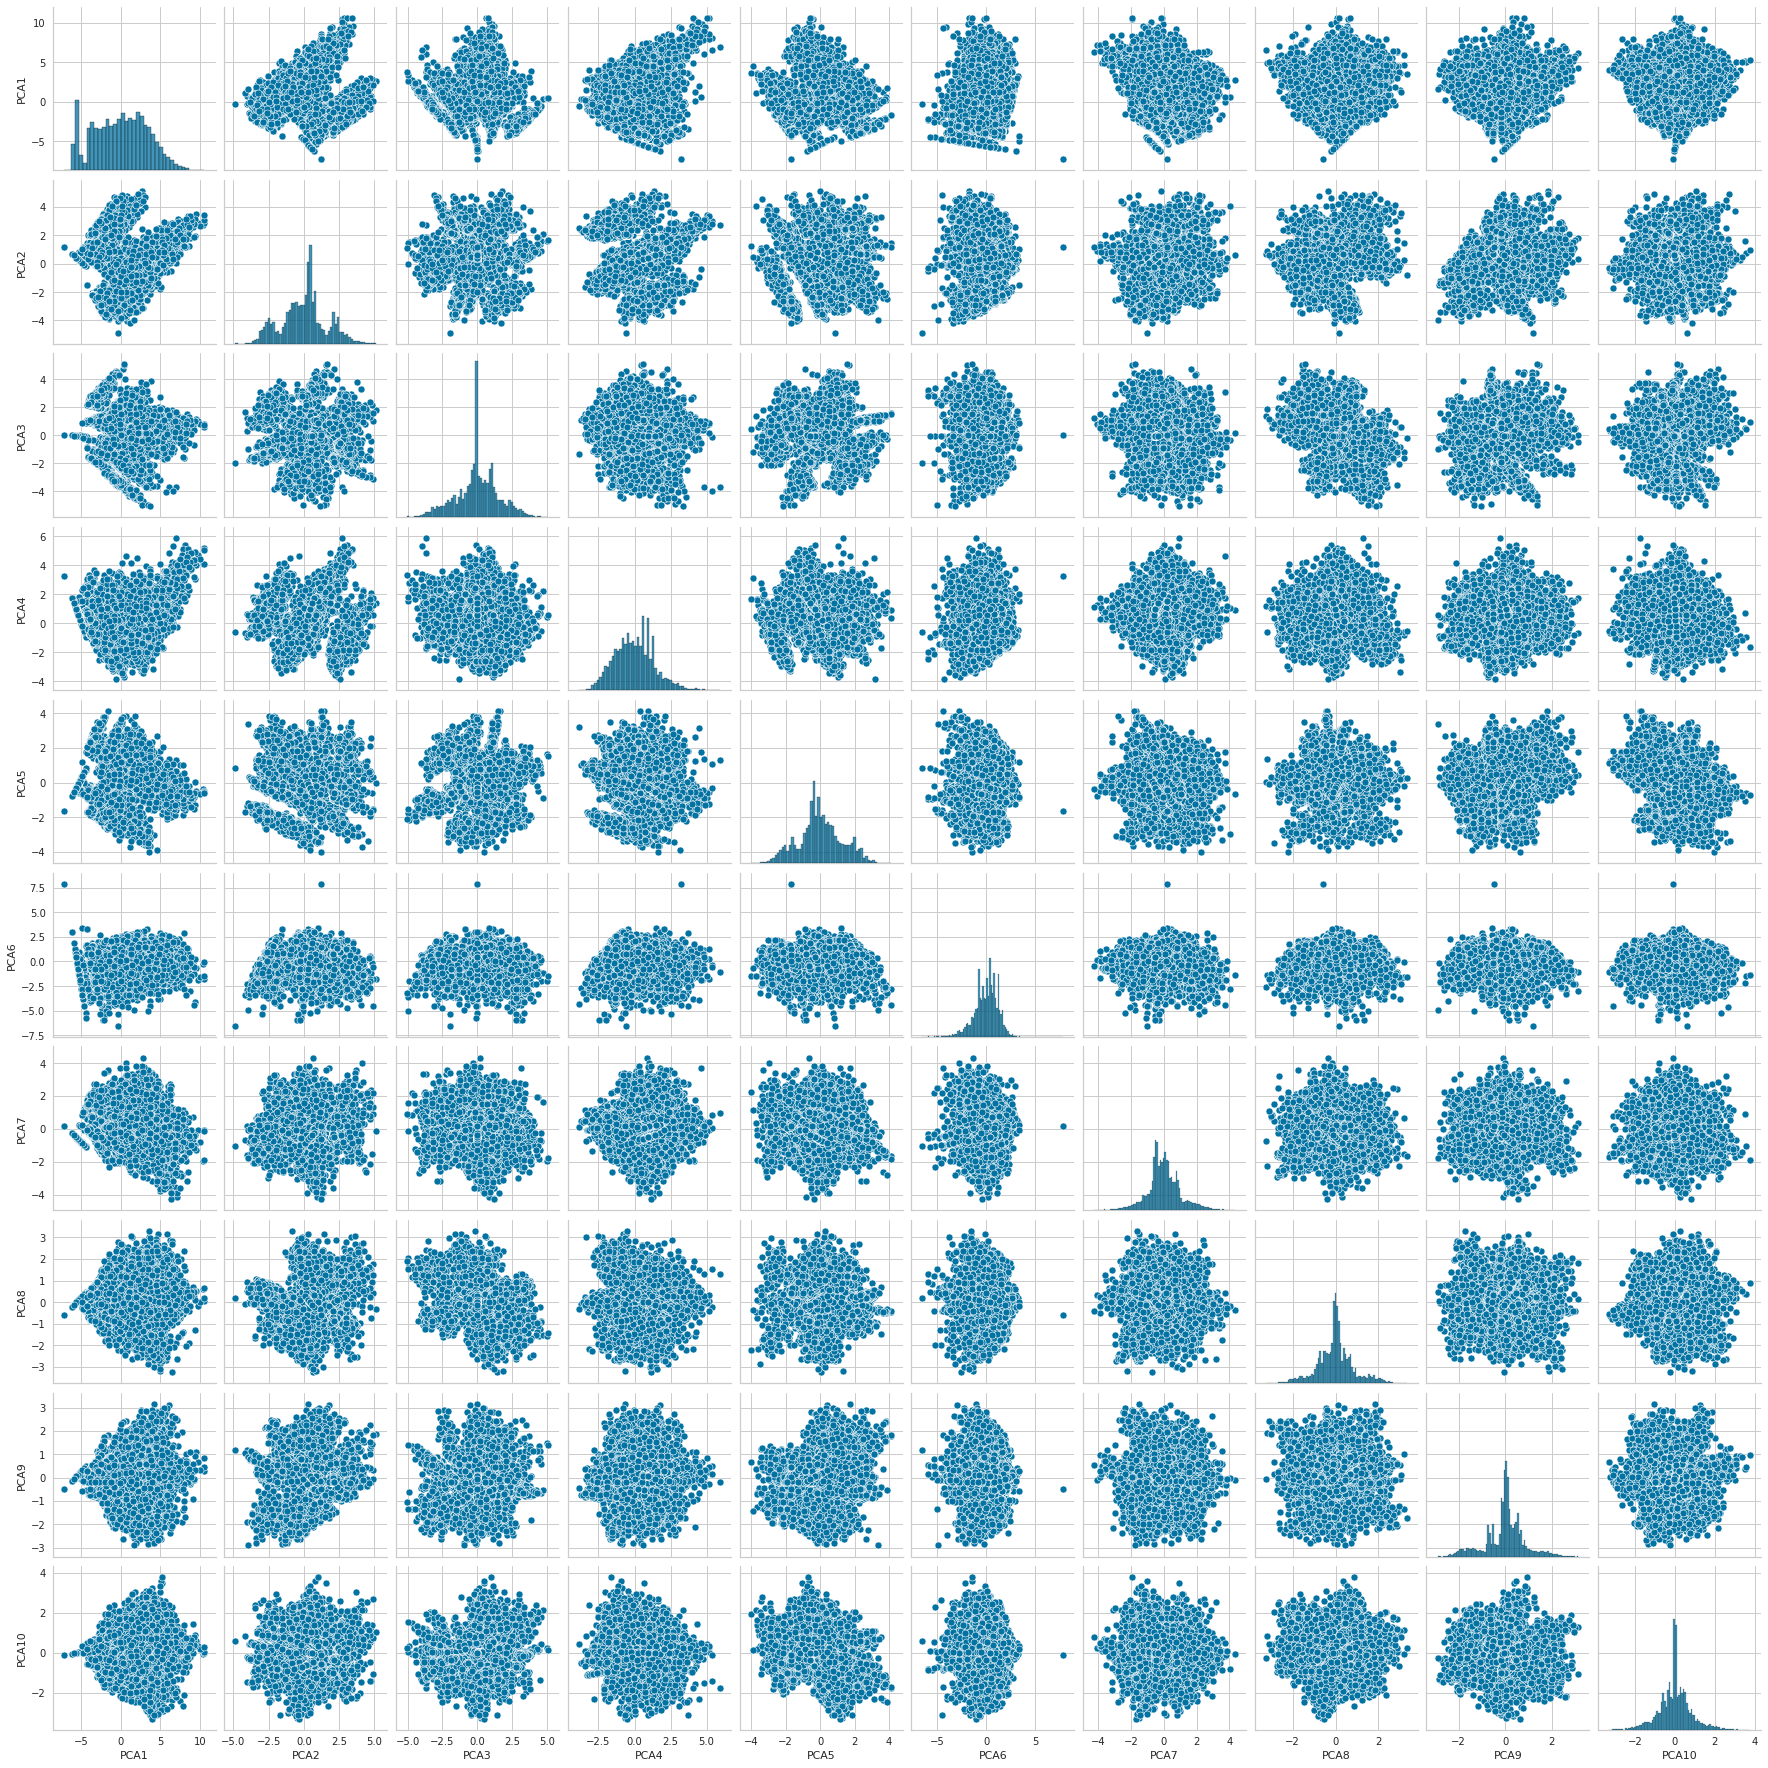

In [125]:
sns.pairplot(df2)

In [126]:
df2.columns

Index(['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9',
       'PCA10'],
      dtype='object')

In [127]:
pcacols=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9',
       'PCA10']

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


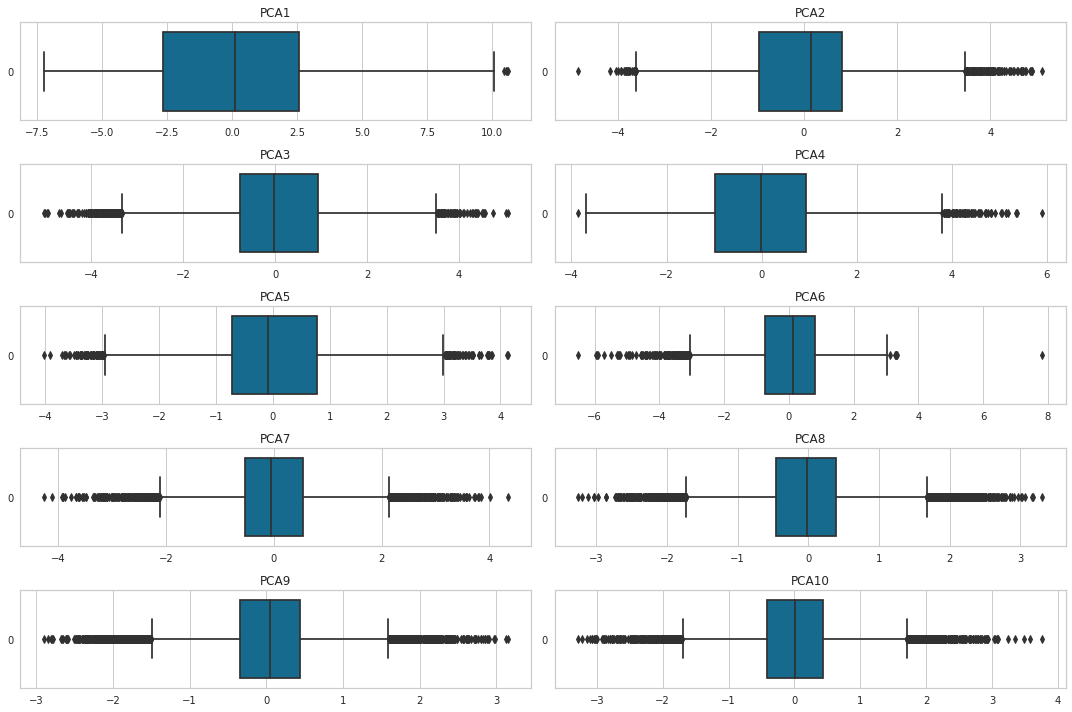

In [131]:
rep=1
ncols=2
nrows=5

plt.figure(figsize=(15,10))
for i in pcacols:
    plt.subplot(nrows,ncols,rep)
    sns.boxplot(df2.loc[:,i],orient='h')
    plt.title(i)
    rep+=1
plt.tight_layout()
plt.show()

In [134]:
for i in df2.columns:
    q1 = df2[i].quantile(0.25)
    q3 = df2[i].quantile(0.75)
    iqr = q3-q1
    ul= q3+(iqr*1.5)
    ll= q1-(iqr*1.5)
    df2.loc[df2[i]>ul]=ul
    df2.loc[df2[i]<ll]=ll

In [136]:
df2.head()

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0  1.348108 -0.896878 -0.009385 -1.425037  0.218108  1.387382  0.819467   
1 -1.986748 -1.986748 -1.986748 -1.986748 -1.986748 -1.986748 -1.986748   
2  0.939245 -0.351275 -0.709452 -1.326693 -2.564487  0.627054 -0.183265   
3  1.894212  1.894212  1.894212  1.894212  1.894212  1.894212  1.894212   
4  1.787982 -1.125931 -0.231333 -2.371314  0.631117 -0.253798  0.885755   

       PCA8      PCA9     PCA10  
0 -0.035297 -0.182259 -0.110115  
1 -1.986748 -1.986748 -1.986748  
2  1.044716  0.879637  0.190898  
3  1.894212  1.894212  1.894212  
4 -0.009855  0.090358  0.009271

In [138]:
df2.isnull().sum()

PCA1     0
PCA2     0
PCA3     0
PCA4     0
PCA5     0
PCA6     0
PCA7     0
PCA8     0
PCA9     0
PCA10    0
dtype: int64

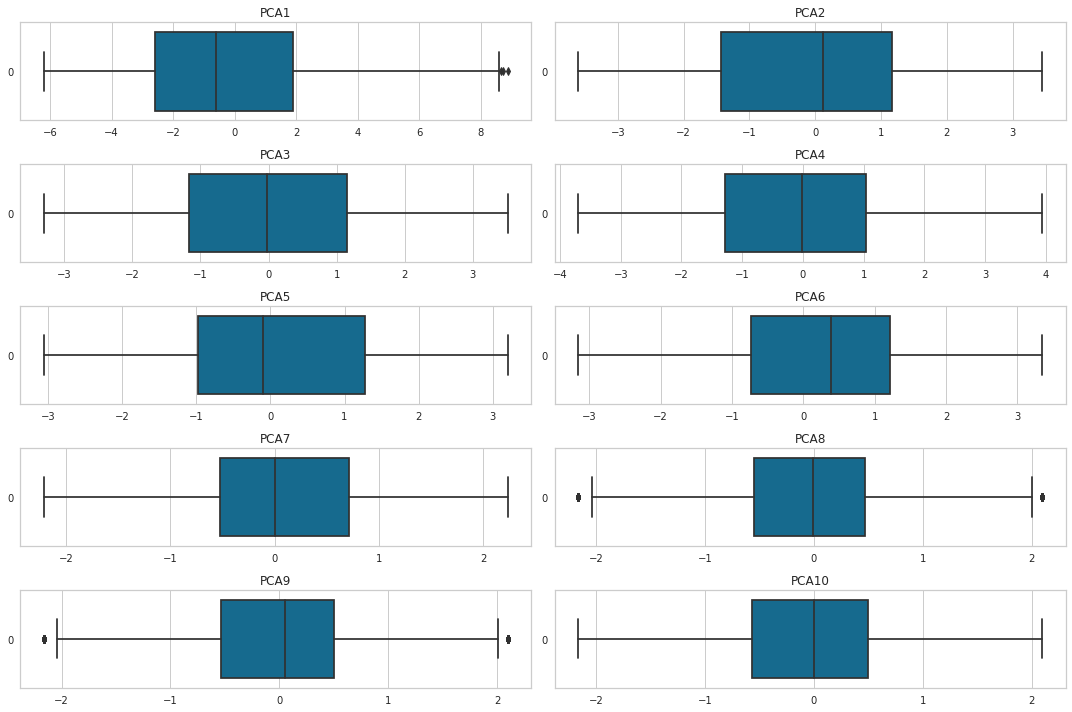

In [139]:
rep=1
ncols=2
nrows=5

plt.figure(figsize=(15,10))
for i in pcacols:
    plt.subplot(nrows,ncols,rep)
    sns.boxplot(df2.loc[:,i],orient='h')
    plt.title(i)
    rep+=1
plt.tight_layout()
plt.show()

### Clustering: PCA ,K-means and Agglomerative Custering

In [140]:
nclus= range(2,20)

In [145]:
wcss=[]
for i in nclus:
    kmeans =KMeans(n_clusters=i,random_state=2)
    m2= kmeans.fit(df2)
    wcss.append(m2.inertia_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [159]:
wcss

[168545.88639482367,
 138785.71406987784,
 111243.48744317672,
 93789.31462263952,
 81169.64359292883,
 70925.31934084656,
 64474.88271837517,
 59997.97677218233,
 55102.42519026967,
 51631.07599444271,
 48593.37549488148,
 46490.512141638355,
 42849.67196772997,
 40426.89130989899,
 38736.546724948836,
 36886.07640527462,
 35881.02222694592,
 34131.96850933229]

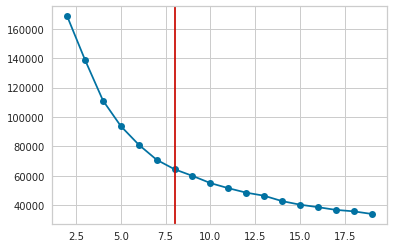

In [149]:
plt.plot(nclus,wcss,marker='o')
plt.axvline(x=8,color='r')
plt.show()

<IPython.core.display.Javascript object>

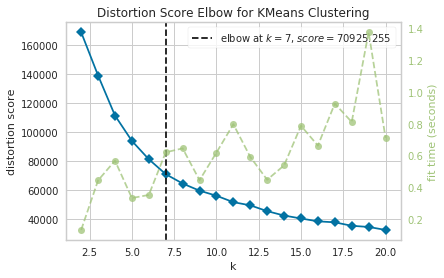

In [163]:
kelbow =KElbowVisualizer(estimator=KMeans(),k=20,marker='o')
kelbow.fit(df2)
kelbow.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

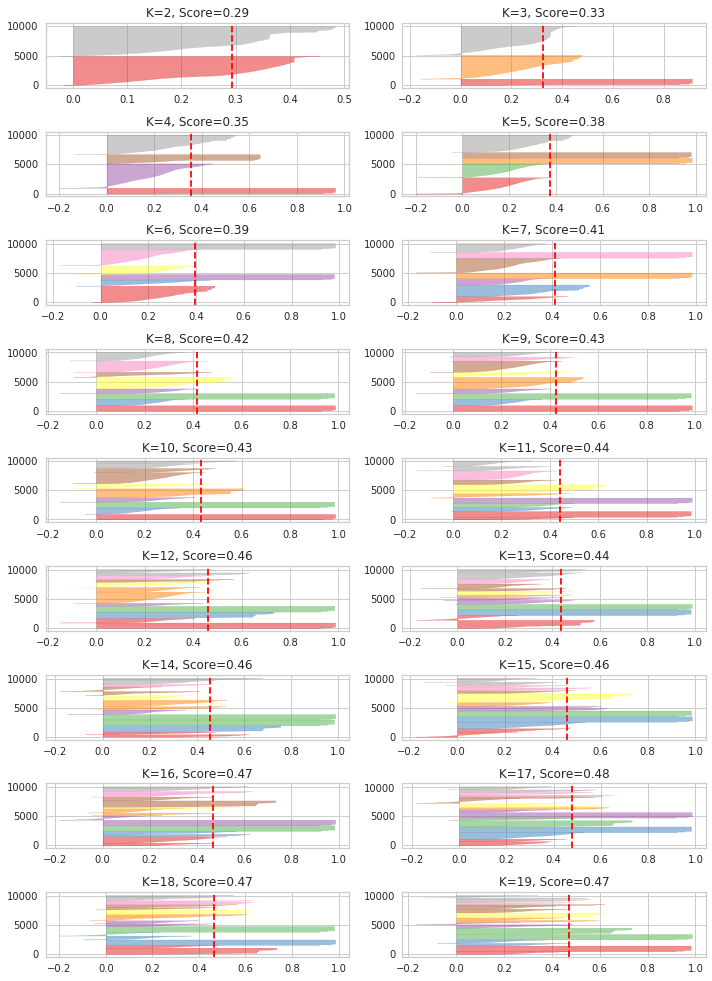

In [170]:
rep=1
nrows=10
ncols=2

plt.figure(figsize=(10,15))
for i in range(2,20):
    plt.subplot(nrows,ncols,rep)
    m2= KMeans(n_clusters=i,random_state=2)
    silviz= SilhouetteVisualizer(m2)
    silviz.fit(df2)
    plt.title('K=%d, Score=%.2f'%(i,silviz.silhouette_score_))
    rep+=1
plt.tight_layout()
plt.show()

In [205]:
m3 = KMeans(n_clusters=2,random_state=10)

<IPython.core.display.Javascript object>

In [206]:
df2['Label']= m3.fit_predict(df2)

In [207]:
df2

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0      1.348108 -0.896878 -0.009385 -1.425037  0.218108  1.387382  0.819467   
1     -1.986748 -1.986748 -1.986748 -1.986748 -1.986748 -1.986748 -1.986748   
2      0.939245 -0.351275 -0.709452 -1.326693 -2.564487  0.627054 -0.183265   
3      1.894212  1.894212  1.894212  1.894212  1.894212  1.894212  1.894212   
4      1.787982 -1.125931 -0.231333 -2.371314  0.631117 -0.253798  0.885755   
...         ...       ...       ...       ...       ...       ...       ...   
10002 -6.203142  0.695924  0.011195  1.749171 -0.792332  3.018928 -0.264639   
10003 -6.209889  0.696794  0.000399  1.752959 -0.788684  3.016851 -0.266699   
10004 -4.312009 -1.524849 -0.878900  2.024254 -0.861251  3.317606 -0.081095   
10005  1.894212  1.894212  1.894212  1.894212  1.894212  1.894212  1.894212   
10006 -5.996536  0.588997 -0.035614  1.422833 -0.574400  1.903562 -0.379377   

           PCA8      PCA9     PCA10  Label  
0     -0.035297 -0.182259 -0.110115      0  
1     -1.986748 -1.986748 -1.986748      1  
2      1.044716  0.879637  0.190898      0  
3      1.894212  1.894212  1.894212      0  
4     -0.009855  0.090358  0.009271      0  
...         ...       ...       ...    ...  
10002 -0.216673 -0.141726 -0.038406      1  
10003 -0.217579 -0.141040 -0.038158      1  
10004 -0.189715  0.295904  0.191569      1  
10005  1.894212  1.894212  1.894212      0  
10006 -0.132250 -0.058257 -0.020131      1  

[10007 rows x 11 columns]

In [208]:
df2.Label.value_counts()

0    5097
1    4910
Name: Label, dtype: int64

In [209]:
centroid = m3.cluster_centers_

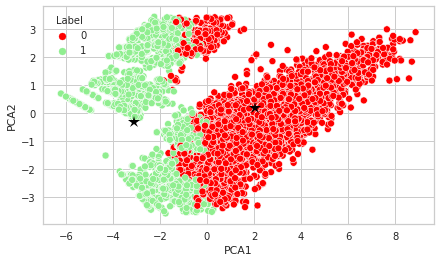

In [217]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=df2,x='PCA1',y='PCA2',hue='Label',palette=['red','lightgreen'])
for i in range(2):
    plt.plot(centroid[i][0],centroid[i][1],color='black',marker='*',ms=13)
plt.show()

In [232]:
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster,cophenet
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import pdist

In [220]:
df3=df2.drop('Label',axis=1)

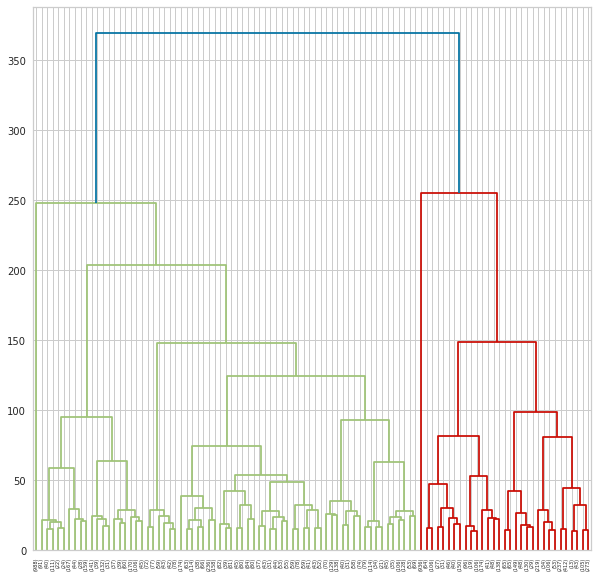

In [228]:
plt.figure(figsize=(10,10))
merge = linkage(df3,method='ward',metric='euclidean')
dendrogram(merge,truncate_mode='lastp',p=100)
plt.show()

In [231]:
for i in [100,150,200,220,230,238,250,255,265,270,280,300,350,380,400]:
    clusters = fcluster(merge,i,criterion='distance')
    print('Cluster for distance:',i,':',len(np.unique(clusters)))

Cluster for distance: 100 : 8
Cluster for distance: 150 : 5
Cluster for distance: 200 : 5
Cluster for distance: 220 : 4
Cluster for distance: 230 : 4
Cluster for distance: 238 : 4
Cluster for distance: 250 : 3
Cluster for distance: 255 : 3
Cluster for distance: 265 : 2
Cluster for distance: 270 : 2
Cluster for distance: 280 : 2
Cluster for distance: 300 : 2
Cluster for distance: 350 : 2
Cluster for distance: 380 : 1
Cluster for distance: 400 : 1


In [233]:
c,coeph = cophenet(merge,pdist(df3))
print("ccc:",c)

ccc: 0.6617086754206647


In [243]:
agglo= AgglomerativeClustering(n_clusters=2,linkage='ward')

In [244]:
m4 = agglo.fit(df3)

In [254]:
df3['Label'] = m4.fit_predict(df3)

In [248]:
centroids

array([[ 2.1292383 ,  0.18780735,  0.45745943,  0.11073463,  0.54918895,
         0.71689337,  0.56033524,  0.36992746,  0.36136838,  0.36562619],
       [-2.98453201, -0.32792984, -0.38431568, -0.19632801, -0.48608714,
        -0.36767556, -0.46969542, -0.38903669, -0.36879216, -0.38780631]])

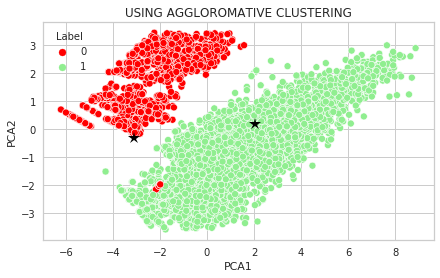

In [270]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=df3,x='PCA1',y='PCA2',hue='Label',palette=['red','lightgreen'])
plt.title('USING AGGLOROMATIVE CLUSTERING')
for i in range(2):
    plt.plot(centroid[i][0],centroid[i][1],color='black',marker='*',ms=13)
plt.show()

In [ ]:
# DATA IS BEING BEST INTERPRETION AND CLUSTER FORMATION OF THE DATA IS BEING DONE BY AGGLOROMATIVE CLUSTERING.

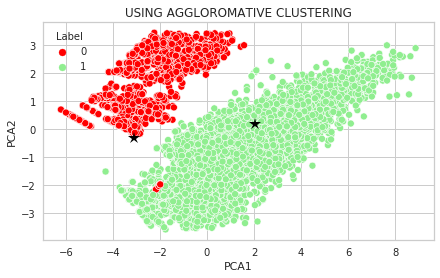

In [302]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=df3,x='PCA1',y='PCA2',hue='Label',palette=['red','lightgreen'])
plt.title('USING AGGLOROMATIVE CLUSTERING')
for i in range(2):
    plt.plot(centroid[i][0],centroid[i][1],color='black',marker='*',ms=13)
plt.show()

### Model Building

In [273]:
from sklearn.model_selection import train_test_split
X= df3.drop('Label',axis=1)
y= df3.Label
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.30,random_state=2)

In [293]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
lo = LogisticRegression()
rfc= RandomForestClassifier(criterion='gini',max_features='sqrt',max_depth=35)

In [281]:
from sklearn.metrics import classification_report

In [278]:
m1 = lo.fit(xtrain,ytrain)

In [290]:
ypred_m1 = m1.predict(xtest)

In [280]:
ypred_m1_pred = m1.predict_proba(xtest)

In [282]:
print(classification_report(ytest,ypred_m1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1217
           1       1.00      1.00      1.00      1786

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003



In [288]:
m2 = rfc.fit(xtrain,ytrain)

In [291]:
ypred_m2 = m2.predict(xtest)

In [294]:
print(classification_report(ytest,ypred_m2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1217
           1       1.00      1.00      1.00      1786

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003



In [ ]:
# We can see that k=2 is exactly the same predicted by ML models.

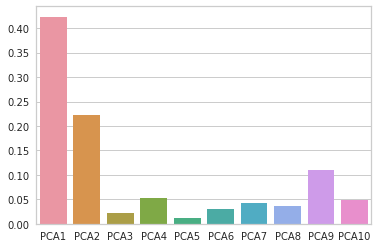

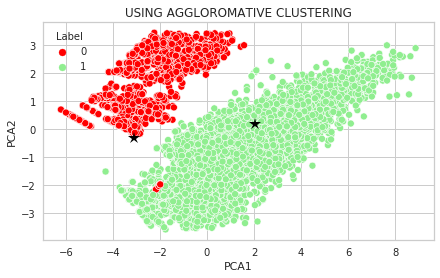

In [303]:
sns.barplot(x= m2.feature_names_in_,y=m2.feature_importances_)

plt.figure(figsize=(7,4))
sns.scatterplot(data=df3,x='PCA1',y='PCA2',hue='Label',palette=['red','lightgreen'])
plt.title('USING AGGLOROMATIVE CLUSTERING')
for i in range(2):
    plt.plot(centroid[i][0],centroid[i][1],color='black',marker='*',ms=13)
plt.show()

* PCA 1 explains the most about the data followed by PCA2.
* The best method used for clustering is Aggloromative clustering method.
* Best number of clusters is 2 clusters.
* This exercise can help us interpret that the customers based on their characterstics and shopping behaviour will stay with us and shop again or leave and never come back.
* This can help us identify the customer's behaviour and what all other features and services we can introduce to our portal.
* Also this can help us to do SWOT analysis for our business.
* This will also help us that know that what are the KPIs of our business and improve the churn of the company.